## Computer Vision Assignment-4
## Name: Jayesh Nayak
## Roll No.: 121CS0195


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD,Adam,Nadam
from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner import RandomSearch,GridSearch,BayesianOptimization,Hyperband

### 1. Implement deep multilayer perceptron (MLP) models with following specifications using TensorFlow for classifying the MNIST dataset. Train the model on the MNIST training set and evaluate its performance on the test set. Write modularized code and call it 10 times and compute the mean of test accuracy for each of the following 4 Sequential models.

In [8]:
# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [9]:
train_images.shape, train_labels.shape,test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

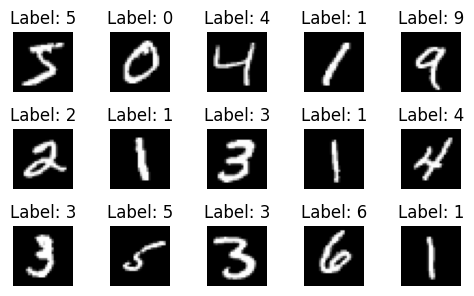

In [10]:
# Display some sample images
plt.figure(figsize=(5,5))
for i in range(15):
    plt.subplot(5, 5, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [11]:
X_trn = train_images[:1000]
y_trn = train_labels[:1000]
X_tst = test_images[:500]
y_tst = test_labels[:500]

In [12]:
X_trn.shape,y_trn.shape

((1000, 28, 28), (1000,))

In [13]:
X_trn = X_trn.reshape((X_trn.shape[0], 28 * 28)).astype('float32') / 255
X_tst = X_tst.reshape((X_tst.shape[0], 28 * 28)).astype('float32') / 255

## Without Hyperparameter

In [14]:
# Number of times to call the model
num_calls = 1
# List to store test accuracies
test_accuracies = []
for i in range(num_calls):
    print("step: ",i+1)
    # Define, compile, and train the model

    model = keras.Sequential()
    # model.add(Dense(128, activation='sigmoid',input_shape=(784,)))
    # model.add(Dropout(0.5))
    # model.add(Dense(64, activation='tanh'))
    # model.add(Dropout(0.4))
    # model.add(Dense(32, activation='relu'))
    # model.add(Dropout(0.3))
    # model.add(Dense(16, activation='selu'))
    # model.add(Dropout(0.1))
    # model.add(Dense(10, activation='softmax'))

    model.add(Dense(128, activation='sigmoid',input_shape=(784,)))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='tanh'))
    model.add(Dropout(0.4))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(16, activation='selu'))
    model.add(Dropout(0.1))
    model.add(Dense(10, activation='softmax'))
    
    adam = Adam(learning_rate=0.01)
    model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_trn, y_trn, epochs=10, batch_size=32)

    # Evaluate the model on test data
    _, test_accuracy = model.evaluate(X_tst, y_tst,verbose=0)

    # Append test accuracy to the list
    test_accuracies.append(test_accuracy)
    # Compute the mean of test accuracies
    mean_test_accuracy = np.mean(test_accuracies)
    print("Mean Test Accuracy:", mean_test_accuracy)

step:  1
Epoch 1/10
32/32 [==============================] - 3s 8ms/step - loss: 2.2562 - accuracy: 0.1600
Epoch 2/10
32/32 [==============================] - 0s 4ms/step - loss: 1.8494 - accuracy: 0.3040
Epoch 3/10
32/32 [==============================] - 0s 4ms/step - loss: 1.4753 - accuracy: 0.4460
Epoch 4/10
32/32 [==============================] - 0s 4ms/step - loss: 1.2635 - accuracy: 0.5020
Epoch 5/10
32/32 [==============================] - 0s 4ms/step - loss: 1.0335 - accuracy: 0.6370
Epoch 6/10
32/32 [==============================] - 0s 4ms/step - loss: 0.9204 - accuracy: 0.6840
Epoch 7/10
32/32 [==============================] - 0s 4ms/step - loss: 0.8387 - accuracy: 0.7020
Epoch 8/10
32/32 [==============================] - 0s 3ms/step - loss: 0.8649 - accuracy: 0.7000
Epoch 9/10
32/32 [==============================] - 0s 4ms/step - loss: 0.8058 - accuracy: 0.7370
Epoch 10/10
32/32 [==============================] - 0s 4ms/step - loss: 0.6846 - accuracy: 0.7690
Mean Test 

In [15]:
#Function to calculate Mean Test Accuracy
def mean_accuracy(optimizer_value, rate_of_learning=0.1):
    # Number of times to call the model
    num_calls = 1
    # List to store test accuracies
    test_accuracies = []
    for i in range(num_calls):
        print("step: ",i+1)
        # Define, compile, and train the model

        model = keras.Sequential()

        model.add(Dense(128, activation='sigmoid',input_shape=(784,)))
        model.add(Dropout(0.5))
        model.add(Dense(64, activation='tanh'))
        model.add(Dropout(0.4))
        model.add(Dense(32, activation='relu'))
        model.add(Dropout(0.3))
        model.add(Dense(16, activation='selu'))
        model.add(Dropout(0.1))
        model.add(Dense(10, activation='softmax'))

        if optimizer_value == 'SGD':
            optimizer = SGD(learning_rate=rate_of_learning)
        elif optimizer_value == 'Adam':
            optimizer = Adam(learning_rate=rate_of_learning)
        elif optimizer_value == 'AdamW':
            optimizer = tf.keras.optimizers.AdamW(learning_rate=rate_of_learning)
        elif optimizer_value == 'Nadam':
            optimizer = Nadam(learning_rate=rate_of_learning)
            
        model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        model.fit(X_trn, y_trn, epochs=10, batch_size=32)

    # Evaluate the model on test data
        _, test_accuracy = model.evaluate(X_tst, y_tst,verbose=0)

    # Append test accuracy to the list
        test_accuracies.append(test_accuracy)
    # Compute the mean of test accuracies
    mean_test_accuracy = np.mean(test_accuracies)
    print("Mean Test Accuracy:", mean_test_accuracy)

In [16]:
mean_accuracy('SGD')

step:  1
Epoch 1/10
32/32 [==============================] - 1s 4ms/step - loss: 2.4213 - accuracy: 0.1020
Epoch 2/10
32/32 [==============================] - 0s 4ms/step - loss: 2.3145 - accuracy: 0.1080
Epoch 3/10
32/32 [==============================] - 0s 4ms/step - loss: 2.3117 - accuracy: 0.1210
Epoch 4/10
32/32 [==============================] - 0s 4ms/step - loss: 2.2894 - accuracy: 0.1300
Epoch 5/10
32/32 [==============================] - 0s 4ms/step - loss: 2.2871 - accuracy: 0.1420
Epoch 6/10
32/32 [==============================] - 0s 5ms/step - loss: 2.2259 - accuracy: 0.1720
Epoch 7/10
32/32 [==============================] - 0s 5ms/step - loss: 2.1583 - accuracy: 0.2000
Epoch 8/10
32/32 [==============================] - 0s 6ms/step - loss: 2.0694 - accuracy: 0.2260
Epoch 9/10
32/32 [==============================] - 0s 6ms/step - loss: 1.9757 - accuracy: 0.2780
Epoch 10/10
32/32 [==============================] - 0s 7ms/step - loss: 1.9248 - accuracy: 0.3040
Mean Test 

### b. Model-2: 4 hidden layers having 128, 64, 32, 16 number of neurons respectively with activation function sigmoid, tanh, relu and selu respectively and dropout rate set to 0.5, 0.4, 0.3, 0.1 respectively. Use optimizer as Adam with batch size set to 32




In [17]:
mean_accuracy('Adam')

step:  1
Epoch 1/10
32/32 [==============================] - 1s 7ms/step - loss: 3.1218 - accuracy: 0.0970
Epoch 2/10
32/32 [==============================] - 0s 5ms/step - loss: 2.7489 - accuracy: 0.0970
Epoch 3/10
32/32 [==============================] - 0s 5ms/step - loss: 2.6673 - accuracy: 0.0950
Epoch 4/10
32/32 [==============================] - 0s 5ms/step - loss: 2.5801 - accuracy: 0.1090
Epoch 5/10
32/32 [==============================] - 0s 4ms/step - loss: 2.6765 - accuracy: 0.1020
Epoch 6/10
32/32 [==============================] - 0s 4ms/step - loss: 2.3667 - accuracy: 0.0990
Epoch 7/10
32/32 [==============================] - 0s 4ms/step - loss: 2.3205 - accuracy: 0.0960
Epoch 8/10
32/32 [==============================] - 0s 5ms/step - loss: 2.3241 - accuracy: 0.0950
Epoch 9/10
32/32 [==============================] - 0s 5ms/step - loss: 2.3168 - accuracy: 0.1060
Epoch 10/10
32/32 [==============================] - 0s 5ms/step - loss: 2.3153 - accuracy: 0.1190
Mean Test 

### c. Model-3: 4 hidden layers having 128, 64, 32, 16 number of neurons respectively with activation function sigmoid, tanh, relu and selu respectively and dropout rate set to 0.5, 0.4, 0.3, 0.1 respectively. Use optimizer as AdamW with learning rate 0.1 with batch size set to 32




In [18]:
mean_accuracy('AdamW')

step:  1


AttributeError: module 'tensorflow.keras.optimizers' has no attribute 'AdamW'

### d. Model-4: 4 hidden layers having 128, 64, 32, 16 number of neurons respectively with activation function sigmoid, tanh, relu and selu respectively and dropout rate set to 0.5, 0.4, 0.3, 0.1 respectively. Use optimizer as Nadam with learning rate 0.1 with batch size set to 32

In [19]:
mean_accuracy('Nadam')

step:  1
Epoch 1/10
32/32 [==============================] - 1s 11ms/step - loss: 2.6065 - accuracy: 0.0880
Epoch 2/10
32/32 [==============================] - 0s 7ms/step - loss: 2.3206 - accuracy: 0.0960
Epoch 3/10
32/32 [==============================] - 0s 7ms/step - loss: 2.3250 - accuracy: 0.1050
Epoch 4/10
32/32 [==============================] - 0s 7ms/step - loss: 2.3202 - accuracy: 0.0910
Epoch 5/10
32/32 [==============================] - 0s 7ms/step - loss: 2.3185 - accuracy: 0.1040
Epoch 6/10
32/32 [==============================] - 0s 7ms/step - loss: 2.3250 - accuracy: 0.1010
Epoch 7/10
32/32 [==============================] - 0s 7ms/step - loss: 2.8187 - accuracy: 0.1040
Epoch 8/10
32/32 [==============================] - 0s 9ms/step - loss: 2.3906 - accuracy: 0.0990
Epoch 9/10
32/32 [==============================] - 0s 8ms/step - loss: 2.3689 - accuracy: 0.0960
Epoch 10/10
32/32 [==============================] - 0s 7ms/step - loss: 2.3502 - accuracy: 0.1090
Mean Test

In [20]:
def build_model(hp):

    hp_neurons = hp.Int('neurons', min_value=32, max_value=512, step=32)

    model = keras.Sequential()
    model.add(Dense(units=hp_neurons, activation='sigmoid',input_shape=(784,)))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='tanh'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='tanh'))
    model.add(Dropout(0.5))
    model.add(Dense(16, activation='tanh'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    hp_learning_rate = hp.Choice('learning_rate', values=[0.1, 0.01, 0.15])
    hp_batch_size = hp.Choice('batch_size', values=[4, 8, 16])
    # Compile the model
    model.compile(optimizer=keras.optimizers.SGD(learning_rate=hp_learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [21]:
# Configure the tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='keras_tuner_mnist',
    project_name='mnist_hyperparameters'
)

Reloading Tuner from keras_tuner_mnist\mnist_hyperparameters\tuner0.json


In [22]:
hp_batch_size = tuner.oracle.get_space()['batch_size']
tuner.search(X_trn, y_trn, epochs=5, validation_data=(X_tst, y_tst), batch_size=hp_batch_size)

In [23]:
# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_neurons = best_hps.get('neurons')
best_learning_rate = best_hps.get('learning_rate')
best_batch_size = best_hps.get('batch_size')
print(f"Best number of neurons: {best_neurons}")
print(f"Best learning rate: {best_learning_rate}")
print(f"Best batch size: {best_batch_size}")
# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]
# Evaluate the best model
loss, accuracy = best_model.evaluate(X_tst, y_tst)
print(f"Test accuracy of the best model: {accuracy}")

Best number of neurons: 32
Best learning rate: 0.15
Best batch size: 8
16/16 [==============================] - 0s 4ms/step - loss: 1.4857 - accuracy: 0.3980
Test accuracy of the best model: 0.39800000190734863


In [24]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 16)                5

### 2. Tune the hyperparameters using kerastuner to select the best learning rate among the set {0.1, 0.01, 0.15} with batch size varying between {4,8,16} and first hidden layer neurons varying between 250 to 260 with a step value of 2. 2nd, 3rd and 4th hidden layer contains 16, 8, 4 numbers of neurons respectively. The four layers have activation function sigmoid, tanh, relu and selu respectively. Use optimizer as SGD and find the best hyperparameters to predict the MNIST test data.

In [25]:
def build_model(hp):

    hp_neurons = hp.Int('neurons', min_value=32, max_value=512, step=32)

    model = keras.Sequential()
    model.add(Dense(units=hp_neurons, activation='sigmoid',input_shape=(784,)))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='tanh'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='tanh'))
    model.add(Dropout(0.5))
    model.add(Dense(16, activation='tanh'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    # model = Sequential([
    # Dense(units=hp_neurons, activation='sigmoid', input_shape=(784,)),
    # Dropout(0.5),
    # Dense(64, activation='tanh'),
    # Dropout(0.4),
    # Dense(32, activation='relu'),
    # Dropout(0.3),
    # Dense(16, activation='selu'),
    # Dropout(0.1),
    # Dense(10, activation='softmax')
    # ])
    # Tune learning rate and batch size
    hp_learning_rate = hp.Choice('learning_rate', values=[0.1, 0.01, 0.15])
    hp_batch_size = hp.Choice('batch_size', values=[4, 8, 16])
    # Compile the model
    model.compile(optimizer=keras.optimizers.SGD(learning_rate=hp_learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [26]:
# Configure the tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='keras_tuner_mnist',
    project_name='mnist_hyperparameters'
)

Reloading Tuner from keras_tuner_mnist\mnist_hyperparameters\tuner0.json


In [27]:
hp_batch_size = tuner.oracle.get_space()['batch_size']
tuner.search(X_trn, y_trn, epochs=5, validation_data=(X_tst, y_tst), batch_size=hp_batch_size)

In [28]:
# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_neurons = best_hps.get('neurons')
best_learning_rate = best_hps.get('learning_rate')
best_batch_size = best_hps.get('batch_size')
print(f"Best number of neurons: {best_neurons}")
print(f"Best learning rate: {best_learning_rate}")
print(f"Best batch size: {best_batch_size}")
# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]
# Evaluate the best model
loss, accuracy = best_model.evaluate(X_tst, y_tst)
print(f"Test accuracy of the best model: {accuracy}")

Best number of neurons: 32
Best learning rate: 0.15
Best batch size: 8
16/16 [==============================] - 0s 3ms/step - loss: 1.4857 - accuracy: 0.3980
Test accuracy of the best model: 0.39800000190734863


In [29]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 16)                5